In [1]:
import seaborn as sns
import os
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np

## Trial data is pasted from the 'results' output of the trial data notebook

In [2]:
trials = [['Liberating Technologies, Inc.', '2024-10-22', 'successful'],
 ['Zealand Pharma', '2024-10-21', 'unsuccessful'],
 ['Mundipharma Research Limited', '2024-10-21', 'borderline'],
 ['HidraMed Solutions Ltd', '2024-10-21', 'successful'],
 ['Mannkind Corporation', '2024-10-18', 'borderline'],
 ['Vergent Bioscience, Inc.', '2024-10-17', 'unsuccessful'],
 ['Elixir Medical Corporation', '2024-10-17', 'borderline'],
 ['Niramai Health Analytix Private Limited', '2024-10-17', 'successful'],
 ['Woebot Health', '2024-10-17', 'successful'],
 ['Farapulse, Inc.', '2024-10-17', 'borderline'],
 ['Biofrontera Bioscience GmbH', '2024-10-17', 'successful'],
 ['Inovio Pharmaceuticals', '2024-10-17', 'unsuccessful'],
 ['BeShape Technologies Ltd.', '2024-10-16', 'unsuccessful'],
 ['Mural Oncology, Inc', '2024-10-16', 'unsuccessful'],
 ['MorphoSys AG', '2024-10-16', 'borderline'],
 ['Mainstay Medical', '2024-10-16', 'borderline'],
 ['BerGenBio ASA', '2024-10-16', 'borderline'],
 ['Chiesi Farmaceutici S.p.A.', '2024-10-15', 'unsuccessful'],
 ['Teijin America, Inc.', '2024-10-15', 'borderline'],
 ['Auris Health, Inc.', '2024-10-15', 'unsuccessful'],
 ['Bial - Portela C S.A.', '2024-10-15', 'borderline'],
 ['Element Science, Inc.', '2024-10-15', 'successful'],
 ['Air Liquide Santé International', '2024-10-15', 'successful'],
 ['Grace Medical, Inc.', '2024-10-15', 'successful'],
 ['Glaukos Corporation', '2024-10-15', 'borderline'],
 ['Biocon Limited', '2024-10-15', 'borderline'],
 ['Sunstar Americas', '2024-10-15', 'successful'],
 ['Medinova AG', '2024-10-15', 'successful'],
 ['EpicentRx, Inc.', '2024-10-15', 'borderline'],
 ['Janssen Pharmaceutical K.K.', '2024-10-09', 'unsuccessful'],
 ['US Oncology Research', '2024-10-09', 'borderline'],
 ['Panoptes Pharma GmbH', '2024-10-09', 'borderline'],
 ['Laurent Pharmaceuticals Inc.', '2024-10-09', 'borderline'],
 ['Concert Pharmaceuticals', '2024-10-09', 'borderline'],
 ['Inotrem', '2024-10-08', 'borderline'],
 ['Medtronic Cardiac Rhythm and Heart Failure', '2024-10-08', 'borderline'],
 ['Artivion Inc.', '2024-10-08', 'borderline'],
 ['Kontigo Care AB', '2024-10-08', 'successful'],
 ['Ekso Bionics', '2024-10-08', 'successful'],
 ['Notitia Biotechnologies Company', '2024-10-08', 'unsuccessful'],
 ['Dendreon', '2024-10-08', 'unsuccessful'],
 ['MedImmune LLC', '2024-10-08', 'borderline'],
 ['Ablative Solutions, Inc.', '2024-10-04', 'unsuccessful'],
 ['Resilience Government Services, Inc.', '2024-10-04', 'borderline'],
 ['Photocure', '2024-10-03', 'successful'],
 ['Ionis Pharmaceuticals, Inc.', '2024-10-03', 'borderline'],
 ['Sandoz', '2024-10-03', 'borderline'],
 ['Hepion Pharmaceuticals, Inc.', '2024-10-03', 'successful'],
 ['Philips Clinical & Medical Affairs Global', '2024-10-02', 'successful'],
 ['BHR Pharma, LLC', '2024-10-02', 'borderline'],
 ['Actelion', '2024-10-01', 'borderline'],
 ['Ocular Therapeutix, Inc.', '2024-10-01', 'borderline'],
 ['Clarity Pharmaceuticals Ltd', '2024-10-01', 'successful'],
 ['Geneoscopy, Inc.', '2024-10-01', 'successful'],
 ['Electrochemical Oxygen Concepts, Inc.', '2024-10-01', 'borderline'],
 ['Procter and Gamble', '2024-10-01', 'borderline'],
 ['Dermosciences France', '2024-10-01', 'unsuccessful'],
 ['Biophytis', '2024-10-01', 'unsuccessful'],
 ['Biotronik SE & Co. KG', '2024-09-27', 'unsuccessful'],
 ['MediWound Ltd', '2024-09-27', 'unsuccessful'],
 ['Point Designs', '2024-09-27', 'successful'],
 ['Alkermes, Inc.', '2024-09-26', 'unsuccessful'],
 ['Evolution Optiks Limited', '2024-09-25', 'successful'],
 ['ACELYRIN Inc.', '2024-09-25', 'unsuccessful'],
 ['Peloton Therapeutics, Inc., a subsidiary of Merck & Co., Inc. (Rahway, New Jersey USA)',
  '2024-09-24',
  'borderline'],
 ['Conformal Medical, Inc', '2024-09-24', 'borderline'],
 ['ONL Therapeutics', '2024-09-24', 'borderline'],
 ['Vicore Pharma AB', '2024-09-24', 'borderline'],
 ['MediciNova', '2024-09-24', 'borderline'],
 ['Ethicon Endo-Surgery', '2024-09-24', 'borderline'],
 ['Biopharma Plasma LLC', '2024-09-23', 'borderline'],
 ['Altec Inc.', '2024-09-23', 'successful'],
 ['Inari Medical', '2024-09-20', 'borderline'],
 ['Adverum Biotechnologies, Inc.', '2024-09-20', 'successful'],
 ['Nihon Kohden', '2024-09-20', 'successful'],
 ['Corium, Inc.', '2024-09-19', 'borderline'],
 ['Travere Therapeutics, Inc.', '2024-09-19', 'successful'],
 ['Swedish Orphan Biovitrum', '2024-09-19', 'successful'],
 ['mAbxience Research S.L.', '2024-09-19', 'unsuccessful'],
 ['HUYABIO International, LLC.', '2024-09-19', 'borderline'],
 ['Cook Group Incorporated', '2024-09-19', 'borderline'],
 ['Pharmacyclics LLC.', '2024-09-19', 'unsuccessful'],
 ['SecuraBio', '2024-09-19', 'borderline'],
 ['Lokon Pharma AB', '2024-09-19', 'borderline'],
 ['Abivax S.A.', '2024-09-19', 'borderline'],
 ['Auris Medical, Inc.', '2024-09-19', 'unsuccessful'],
 ['Endostart srl', '2024-09-19', 'successful'],
 ['Purdue Pharma LP', '2024-09-19', 'successful'],
 ['Bausch Health Americas, Inc.', '2024-09-19', 'borderline'],
 ['Hologic, Inc.', '2024-09-19', 'successful'],
 ['Covalon Technologies Inc.', '2024-09-19', 'successful'],
 ['Entero Therapeutics', '2024-09-19', 'successful'],
 ['Kazia Therapeutics Limited', '2024-09-19', 'borderline'],
 ['Candela Corporation', '2024-09-19', 'successful'],
 ['BioAegis Therapeutics Inc.', '2024-09-19', 'borderline'],
 ['GATT Technologies BV', '2024-09-19', 'borderline'],
 ['Entera Health, Inc', '2024-09-19', 'borderline'],
 ['UroGen Pharma Ltd.', '2024-09-19', 'borderline'],
 ['Avalo Therapeutics, Inc.', '2024-09-05', 'borderline'],
 ['Recovery Force LLC', '2024-09-05', 'successful'],
 ['PhotonMD, Inc', '2024-09-05', 'borderline'],
 ['Evolus, Inc.', '2024-09-04', 'unsuccessful'],
 ['Axonics, Inc.', '2024-09-03', 'borderline'],
 ['Upstream Bio Inc.', '2024-09-03', 'borderline'],
 ['Aquilon Pharmaceuticals S.A.', '2024-09-03', 'successful'],
 ['Affimed GmbH', '2024-08-29', 'borderline'],
 ['Sun Pharmaceutical Industries Limited', '2024-08-29', 'unsuccessful'],
 ['Omeros Corporation', '2024-08-28', 'borderline'],
 ['Janssen Scientific Affairs, LLC', '2024-08-27', 'borderline'],
 ['Brii Biosciences Limited', '2024-08-26', 'borderline'],
 ['Wyeth is now a wholly owned subsidiary of Pfizer',
  '2024-08-23',
  'borderline'],
 ['Artax Biopharma Inc', '2024-08-23', 'borderline'],
 ['Enzymatica AB', '2024-08-23', 'unsuccessful'],
 ['AEON Biopharma, Inc.', '2024-08-22', 'borderline'],
 ['Yamo Pharmaceuticals LLC', '2024-08-21', 'borderline'],
 ['Jazz Pharmaceuticals', '2024-08-21', 'unsuccessful'],
 ['Senseonics, Inc.', '2024-08-20', 'borderline'],
 ['NS Pharma, Inc.', '2024-08-20', 'successful'],
 ['Cynosure, Inc.', '2024-08-20', 'successful'],
 ['Imunon', '2024-08-20', 'borderline'],
 ['SGX Medical LLC', '2024-08-19', 'successful'],
 ['Enanta Pharmaceuticals, Inc', '2024-08-19', 'successful'],
 ['Medtrum France', '2024-08-16', 'borderline'],
 ['Intelligent Hearing Systems', '2024-08-16', 'successful'],
 ['R-Pharm', '2024-08-15', 'unsuccessful'],
 ['Happify Inc.', '2024-08-15', 'unsuccessful'],
 ['Galmed Pharmaceuticals Ltd', '2024-08-14', 'successful'],
 ['Sight Sciences, Inc.', '2024-08-14', 'borderline'],
 ['X4 Pharmaceuticals', '2024-08-14', 'borderline'],
 ['Price Vision Group', '2024-08-14', 'successful'],
 ['Novatek Pharmaceuticals', '2024-08-14', 'borderline'],
 ['Barinthus Biotherapeutics', '2024-08-13', 'borderline'],
 ['Intensity Therapeutics, Inc.', '2024-08-13', 'borderline'],
 ['Deka Research and Development', '2024-08-13', 'borderline'],
 ['Hygeia Touch Inc.', '2024-08-12', 'successful'],
 ['Work Life Help', '2024-08-09', 'successful'],
 ['Zeno Alpha Inc.', '2024-08-09', 'unsuccessful'],
 ['Idorsia Pharmaceuticals Ltd.', '2024-08-09', 'unsuccessful'],
 ['OcuTerra Therapeutics, Inc.', '2024-08-09', 'unsuccessful'],
 ['Dynavax Technologies Corporation', '2024-08-09', 'borderline'],
 ['SPP Pharmaclon Ltd.', '2024-08-09', 'successful'],
 ['Gesynta Pharma AB', '2024-08-09', 'unsuccessful'],
 ['Hvivo', '2024-08-07', 'borderline'],
 ['Rebiotix Inc.', '2024-08-07', 'borderline'],
 ['Wave Neuroscience', '2024-08-07', 'unsuccessful'],
 ['Acer Therapeutics Inc.', '2024-08-07', 'borderline'],
 ['Cordis Corporation', '2024-08-06', 'borderline'],
 ['Cardiac Dimensions Pty Ltd', '2024-08-05', 'borderline'],
 ['AOBiome LLC', '2024-08-05', 'successful'],
 ['TuHURA Biosciences, Inc.', '2024-08-02', 'successful'],
 ['AnaMar AB', '2024-08-02', 'borderline'],
 ['Neurotrope Bioscience, Inc.', '2024-07-31', 'borderline'],
 ['Varian, a Siemens Healthineers Company', '2024-07-31', 'borderline'],
 ['Liquidia Technologies, Inc.', '2024-07-30', 'borderline'],
 ['Yuyu Pharma, Inc.', '2024-07-30', 'borderline'],
 ['OmegaD LLC', '2024-07-29', 'borderline'],
 ['Cinnagen', '2024-07-26', 'unsuccessful'],
 ['Edwards Lifesciences', '2024-07-26', 'borderline'],
 ['Lumendo AG', '2024-07-25', 'successful'],
 ['Alumis Inc', '2024-07-23', 'unsuccessful'],
 ['Antev Ltd.', '2024-07-23', 'borderline'],
 ['DreamFace Technologies, LLC', '2024-07-23', 'successful'],
 ['Angiodynamics, Inc.', '2024-07-19', 'successful'],
 ['KalVista Pharmaceuticals, Ltd.', '2024-07-19', 'unsuccessful'],
 ['Lument AB', '2024-07-19', 'successful'],
 ['Caerus Corporation', '2024-07-17', 'successful'],
 ['Lipocine Inc.', '2024-07-17', 'unsuccessful'],
 ['Ural Telekomunikasyon Sanayi Ticaret Anonim Sirketi',
  '2024-07-15',
  'successful'],
 ['TerSera Therapeutics LLC', '2024-07-15', 'successful'],
 ['DePuy Orthopaedics', '2024-07-11', 'unsuccessful'],
 ['Fulcrum Therapeutics', '2024-07-10', 'unsuccessful'],
 ['SynAct Pharma Aps', '2024-07-10', 'borderline'],
 ['Lifetech Scientific (Shenzhen) Co., Ltd.', '2024-07-10', 'borderline'],
 ['F2G Biotech GmbH', '2024-07-10', 'borderline'],
 ['Jiangsu Simcere Pharmaceutical Co., Ltd.', '2024-07-10', 'borderline'],
 ['ImaginAb, Inc.', '2024-07-09', 'borderline'],
 ['Cellular Sciences, inc.', '2024-07-09', 'unsuccessful'],
 ['HiberCell, Inc.', '2024-07-09', 'unsuccessful'],
 ['Medtronic Diabetes', '2024-07-08', 'unsuccessful'],
 ['Medtronic Surgical Technologies', '2024-07-05', 'successful'],
 ['HKGepitherapeutics', '2024-07-05', 'successful'],
 ['Neurim Pharmaceuticals Ltd.', '2024-07-05', 'borderline'],
 ['American Regent, Inc.', '2024-07-03', 'borderline'],
 ['Savara Inc.', '2024-07-03', 'borderline'],
 ['Sol-Gel Technologies, Ltd.', '2024-07-03', 'borderline'],
 ['Semler Scientific', '2024-07-03', 'successful'],
 ['Astex Pharmaceuticals, Inc.', '2024-07-01', 'unsuccessful'],
 ['Cumberland Pharmaceuticals', '2024-06-28', 'borderline'],
 ['Insmed Incorporated', '2024-06-28', 'borderline'],
 ['AryoGen Pharmed Co.', '2024-06-28', 'unsuccessful'],
 ['Marius Pharmaceuticals', '2024-06-28', 'borderline'],
 ['Cardinal Health 414, LLC', '2024-06-28', 'borderline'],
 ['Eidos Therapeutics, a BridgeBio company', '2024-06-27', 'unsuccessful'],
 ['Meiji Pharma USA Inc.', '2024-06-27', 'borderline'],
 ['Blaze Bioscience Inc.', '2024-06-27', 'borderline'],
 ['AmMax Bio, Inc.', '2024-06-27', 'borderline'],
 ['Basilea Pharmaceutica', '2024-06-26', 'unsuccessful'],
 ['Vogenx, Inc.', '2024-06-25', 'borderline'],
 ['Eupraxia Pharmaceuticals Inc.', '2024-06-25', 'unsuccessful'],
 ['Laboratoire Chauvin', '2024-06-24', 'unsuccessful'],
 ['NanOlogy, LLC', '2024-06-24', 'borderline'],
 ['Palisade Bio', '2024-06-21', 'borderline'],
 ['Ivantis, Inc.', '2024-06-21', 'borderline'],
 ['Tonix Pharmaceuticals, Inc.', '2024-06-20', 'borderline'],
 ['CytoPherx, Inc', '2024-06-20', 'borderline'],
 ['CicloMed LLC', '2024-06-18', 'borderline'],
 ['CStone Pharmaceuticals', '2024-06-18', 'borderline'],
 ['Integra LifeSciences Corporation', '2024-06-18', 'borderline'],
 ['VIVUS LLC', '2024-06-18', 'unsuccessful'],
 ['Nabriva Therapeutics AG', '2024-06-17', 'borderline'],
 ['BioMarin Pharmaceutical', '2024-06-13', 'borderline'],
 ['ALK-Abelló A/S', '2024-06-12', 'unsuccessful'],
 ['Limbix Health, Inc.', '2024-06-12', 'unsuccessful'],
 ['InMode MD Ltd.', '2024-06-11', 'successful'],
 ['Seagen Inc.', '2024-06-11', 'borderline'],
 ['Terns, Inc.', '2024-06-07', 'borderline'],
 ['Matinas BioPharma Nanotechnologies, Inc.', '2024-06-07', 'borderline'],
 ['IntuiTap Medical, Inc', '2024-06-06', 'successful'],
 ['Carl Zeiss Meditec, Inc.', '2024-06-06', 'borderline'],
 ['Perception Neuroscience', '2024-06-04', 'borderline'],
 ['Cyclacel Pharmaceuticals, Inc.', '2024-06-04', 'borderline'],
 ['Reckitt Benckiser Healthcare (UK) Limited', '2024-06-03', 'unsuccessful'],
 ['NuVasive', '2024-05-30', 'borderline'],
 ['Byondis B.V.', '2024-05-30', 'borderline'],
 ['Foresee Pharmaceuticals Co., Ltd.', '2024-05-30', 'borderline'],
 ['Prasco LLC', '2024-05-30', 'unsuccessful'],
 ['Applied Therapeutics, Inc.', '2024-05-30', 'borderline'],
 ['CTI BioPharma', '2024-05-30', 'borderline'],
 ['Venatorx Pharmaceuticals, Inc.', '2024-05-29', 'unsuccessful'],
 ['ONY', '2024-05-29', 'borderline'],
 ['Santen Inc.', '2024-05-29', 'borderline'],
 ['OPKO Health, Inc.', '2024-05-28', 'borderline'],
 ['HighField Biopharmaceuticals Corporation', '2024-05-23', 'successful'],
 ['Sarepta Therapeutics, Inc.', '2024-05-23', 'successful'],
 ['Marani Health', '2024-05-23', 'successful'],
 ['Vaxart', '2024-05-22', 'borderline'],
 ['Galecto Biotech AB', '2024-05-22', 'borderline'],
 ['Johnson & Johnson Private Limited', '2024-05-21', 'borderline'],
 ['LimFlow, Inc.', '2024-05-21', 'borderline'],
 ['GenSpera, Inc.', '2024-05-21', 'borderline'],
 ['Emergent BioSolutions', '2024-05-20', 'borderline'],
 ['Novalead Pharma Private Limited', '2024-05-20', 'borderline'],
 ['Hope Biosciences', '2024-05-20', 'borderline'],
 ['VBI Vaccines Inc.', '2024-05-17', 'borderline'],
 ['Debiopharm International SA', '2024-05-17', 'borderline'],
 ['Hanmi Pharmaceutical Company Limited', '2024-05-17', 'borderline'],
 ['Telix Pharmaceuticals (Innovations) Pty Limited',
  '2024-05-17',
  'borderline'],
 ['AgeneBio', '2024-05-17', 'borderline'],
 ['Shanghai Henlius Biotech', '2024-05-17', 'borderline'],
 ['Alladapt Immunotherapeutics, Inc.', '2024-05-16', 'borderline'],
 ['Najit Technologies, Inc.', '2024-05-16', 'borderline'],
 ['Medexus Pharma, Inc.', '2024-05-16', 'borderline'],
 ['Cortex', '2024-05-16', 'borderline'],
 ['Gan and Lee Pharmaceuticals, USA', '2024-05-14', 'unsuccessful'],
 ['InCarda Therapeutics, Inc.', '2024-05-14', 'unsuccessful'],
 ['Tenax Therapeutics, Inc.', '2024-05-14', 'borderline'],
 ['Altor BioScience', '2024-05-14', 'unsuccessful'],
 ['Million Marker Wellness, Inc.', '2024-05-14', 'unsuccessful'],
 ['Seigla Medical, Inc.', '2024-05-08', 'borderline'],
 ['Rapid Medical', '2024-05-08', 'borderline'],
 ['Oyster Point Pharma, Inc.', '2024-05-07', 'borderline'],
 ['Acesion Pharma', '2024-05-06', 'borderline'],
 ['Medical Group Care, LLC', '2024-05-02', 'successful'],
 ['Suzhou Connect Biopharmaceuticals, Ltd.', '2024-05-01', 'borderline'],
 ['Societe dEtude, de Recherche et de Fabrication',
  '2024-05-01',
  'successful'],
 ['Mahana Therapeutics', '2024-04-29', 'successful'],
 ['Red de Terapia Celular', '2024-04-29', 'borderline'],
 ['CureVac', '2024-04-29', 'borderline'],
 ['Immodulon Therapeutics Ltd', '2024-04-29', 'unsuccessful'],
 ['Guiding Technologies Corporation', '2024-04-26', 'successful'],
 ['Third Wave Therapeutics', '2024-04-26', 'successful'],
 ['Prostate Laser Center, PLLC', '2024-04-25', 'successful'],
 ['OnPoint Vision Inc', '2024-04-25', 'borderline'],
 ['Provention Bio, Inc.', '2024-04-24', 'unsuccessful'],
 ['Cloudbreak Therapeutics, LLC', '2024-04-24', 'borderline'],
 ['Infinite Biomedical Technologies', '2024-04-24', 'successful'],
 ['HighTide Biopharma Pty Ltd', '2024-04-24', 'unsuccessful'],
 ['Capricor Inc.', '2024-04-24', 'borderline'],
 ['Alfasigma S.p.A.', '2024-04-24', 'borderline'],
 ['BUZZZ Pharmaceuticals Limited', '2024-04-23', 'unsuccessful'],
 ['Neurolixis SAS', '2024-04-23', 'borderline'],
 ['Neuronoff, Inc', '2024-04-19', 'successful'],
 ['Armgo Pharma, Inc.', '2024-04-19', 'borderline'],
 ['Eyenovia Inc.', '2024-04-18', 'successful'],
 ['Chelsea Therapeutics', '2024-04-18', 'borderline'],
 ['Procyrion', '2024-04-17', 'borderline'],
 ['Betaliq, Inc.', '2024-04-17', 'unsuccessful'],
 ['Regimmune Corporation', '2024-04-17', 'unsuccessful'],
 ['Modra Pharmaceuticals', '2024-04-17', 'unsuccessful'],
 ['Camino Pharma, LLC', '2024-04-16', 'borderline'],
 ['UNION therapeutics', '2024-04-16', 'unsuccessful'],
 ['Ono Pharmaceutical Co. Ltd', '2024-04-16', 'borderline'],
 ['Stealth BioTherapeutics Inc.', '2024-04-16', 'borderline'],
 ['BlackSwan Vascular, Inc.', '2024-04-12', 'unsuccessful'],
 ['Community and Patient Preference Research Pty Ltd',
  '2024-04-12',
  'borderline'],
 ['CytoDyn, Inc.', '2024-04-11', 'borderline'],
 ['Johnson & Johnson Consumer and Personal Products Worldwide',
  '2024-04-11',
  'unsuccessful'],
 ['Allodynic Therapeutics, Inc', '2024-04-10', 'unsuccessful'],
 ['Teleflex', '2024-04-09', 'unsuccessful'],
 ['Essity Hygiene and Health AB', '2024-04-08', 'unsuccessful'],
 ['Asahi Kasei Pharma Corporation', '2024-04-04', 'borderline'],
 ['Dandelion Science', '2024-04-03', 'unsuccessful'],
 ['Candel Therapeutics, Inc.', '2024-04-03', 'borderline'],
 ['Kiora Pharmaceuticals, Inc.', '2024-04-03', 'successful'],
 ['Reneo Pharma Ltd', '2024-04-03', 'borderline'],
 ['Morphotek', '2024-03-29', 'borderline'],
 ['Appili Therapeutics Inc.', '2024-03-29', 'borderline'],
 ['Caliway Biopharmaceuticals Co., Ltd.', '2024-03-28', 'borderline'],
 ['ADC Therapeutics S.A.', '2024-03-28', 'borderline'],
 ['Lumos Pharma', '2024-03-27', 'borderline'],
 ['Xeris Pharmaceuticals', '2024-03-27', 'unsuccessful'],
 ['iotaMotion, Inc.', '2024-03-27', 'borderline'],
 ['Aprea Therapeutics', '2024-03-26', 'unsuccessful'],
 ['Scioto Biosciences, Inc.', '2024-03-25', 'borderline'],
 ['Urotronic Inc.', '2024-03-22', 'borderline'],
 ['InnFocus Inc.', '2024-03-22', 'borderline'],
 ['KBP Biosciences', '2024-03-21', 'borderline'],
 ['Anokion SA', '2024-03-21', 'borderline'],
 ['Cancer Targeted Technology', '2024-03-21', 'borderline'],
 ['Zurex Pharma, Inc.', '2024-03-20', 'borderline'],
 ['Luminopia', '2024-03-20', 'borderline'],
 ['Novoxel Ltd.', '2024-03-19', 'successful'],
 ['Chiesi Farmaceutici S.p.A.', '2024-03-18', 'successful'],
 ['Band Therapeutics', '2024-03-18', 'borderline'],
 ['Mitsubishi Tanabe Pharma GmbH', '2024-03-18', 'borderline'],
 ['Lucira Health Inc', '2024-03-15', 'successful'],
 ['Santen Pharmaceutical Co., Ltd.', '2024-03-15', 'borderline'],
 ['Bio Sidus SA', '2024-03-15', 'borderline'],
 ['Alkahest, Inc.', '2024-03-13', 'borderline'],
 ['Stuart Therapeutics, Inc.', '2024-03-13', 'unsuccessful'],
 ['Hopeful Aging', '2024-03-13', 'borderline'],
 ['Flint Rehabilitation Devices, LLC', '2024-03-12', 'borderline'],
 ['Cionic, Inc.', '2024-03-12', 'successful'],
 ['BioTeke USA, LLC', '2024-03-12', 'successful'],
 ['Elios Therapeutics, LLC', '2024-03-12', 'borderline'],
 ['G1 Therapeutics, Inc.', '2024-03-12', 'unsuccessful'],
 ['NextCure, Inc.', '2024-03-08', 'borderline'],
 ['Anika Therapeutics, Inc.', '2024-03-07', 'unsuccessful'],
 ['Merus N.V.', '2024-03-07', 'unsuccessful'],
 ['Integrative Research Laboratories AB', '2024-03-06', 'borderline'],
 ['Erchonia Corporation', '2024-03-05', 'successful'],
 ['Clearside Biomedical, Inc.', '2024-03-04', 'borderline'],
 ['Genfleet Therapeutics (Shanghai) Inc.', '2024-03-01', 'borderline'],
 ['Praxis Precision Medicines', '2024-03-01', 'borderline'],
 ['Rivus Pharmaceuticals, Inc.', '2024-03-01', 'borderline'],
 ['CAO Group, Inc.', '2024-02-29', 'successful'],
 ['Mochida Pharmaceutical Company, Ltd.', '2024-02-29', 'borderline'],
 ['QuantuMDx Group Ltd', '2024-02-28', 'successful'],
 ['Hansa Biopharma AB', '2024-02-28', 'borderline'],
 ['Azura Ophthalmics', '2024-02-28', 'unsuccessful'],
 ['MedtronicNeuro', '2024-02-26', 'unsuccessful'],
 ['Firstkind Ltd', '2024-02-23', 'successful'],
 ['EVIVE Biotechnology', '2024-02-23', 'borderline'],
 ['RevBio', '2024-02-21', 'borderline'],
 ['Boryung Pharmaceutical Co., Ltd', '2024-02-20', 'successful'],
 ['Cook MyoSite', '2024-02-16', 'borderline'],
 ['Ocuphire Pharma, Inc.', '2024-02-15', 'successful'],
 ['AEON Biopharma, Inc.', '2024-02-14', 'borderline'],
 ['ORA, Inc.', '2024-02-14', 'borderline'],
 ['Cala Health, Inc.', '2024-02-13', 'successful'],
 ['Senseonics, Inc.', '2024-02-12', 'borderline'],
 ['JDP Therapeutics, Inc.', '2024-02-09', 'borderline'],
 ['Apyx Medical', '2024-02-08', 'borderline'],
 ['Sanaria Inc.', '2024-02-07', 'borderline'],
 ['Envivo Bio Inc', '2024-02-06', 'borderline'],
 ['Medtronic Bakken Research Center', '2024-02-05', 'borderline'],
 ['Spectranetics Corporation', '2024-02-02', 'borderline'],
 ['Woebot Health', '2024-02-02', 'successful'],
 ['Aura Biosciences', '2024-02-01', 'borderline'],
 ['Armata Pharmaceuticals, Inc.', '2024-01-31', 'borderline'],
 ['Amolyt Pharma', '2024-01-31', 'borderline'],
 ['Ayala Pharmaceuticals, Inc,', '2024-01-31', 'borderline'],
 ['USANA Health Sciences', '2024-01-30', 'borderline'],
 ['Brooklyn ImmunoTherapeutics, LLC', '2024-01-30', 'borderline'],
 ['Evofem Inc.', '2024-01-30', 'borderline'],
 ['Olympus Europe SE & Co. KG', '2024-01-30', 'borderline'],
 ['Glaukos Corporation', '2024-01-30', 'unsuccessful'],
 ['Solasia Pharma K.K.', '2024-01-26', 'borderline'],
 ['Cerenovus, Part of DePuy Synthes Products, Inc.',
  '2024-01-26',
  'borderline'],
 ['GenSight Biologics', '2024-01-25', 'borderline'],
 ['SPP Pharmaclon Ltd.', '2024-01-25', 'borderline'],
 ['Cara Therapeutics, Inc.', '2024-01-24', 'borderline'],
 ['NovaSignal Corp.', '2024-01-24', 'unsuccessful'],
 ['R-Pharm', '2024-01-24', 'unsuccessful'],
 ['Almirall, S.A.', '2024-01-23', 'borderline'],
 ['G-Tech Corporation', '2024-01-23', 'successful'],
 ['Acer Medical Inc.', '2024-01-22', 'successful'],
 ['Dong-A ST Co., Ltd.', '2024-01-18', 'borderline'],
 ['VivaVision Biotech, Inc', '2024-01-17', 'borderline'],
 ['Kimberly-Clark Corporation', '2024-01-17', 'successful'],
 ['Lineus Medical', '2024-01-16', 'unsuccessful'],
 ['Tavanta Therapeutics', '2024-01-16', 'unsuccessful'],
 ['Renibus Therapeutics, Inc.', '2024-01-16', 'unsuccessful'],
 ['Infraredx', '2024-01-12', 'borderline'],
 ['Pneumagen Ltd.', '2024-01-11', 'borderline'],
 ['Biotronik SE & Co. KG', '2024-01-11', 'unsuccessful'],
 ['Advanced Medical Solutions Ltd.', '2024-01-11', 'unsuccessful'],
 ['Sientra, Inc.', '2024-01-11', 'borderline'],
 ['Syndax Pharmaceuticals', '2024-01-10', 'borderline'],
 ['Idorsia Pharmaceuticals Ltd.', '2024-01-10', 'unsuccessful'],
 ['Saliwell Ltd.', '2024-01-09', 'successful'],
 ['Kyorin Pharmaceutical Co.,Ltd', '2024-01-08', 'borderline'],
 ['Karyopharm Therapeutics Inc', '2024-01-08', 'unsuccessful'],
 ['Pivot Health Technologies Inc.', '2024-01-05', 'borderline'],
 ['Mineralys Therapeutics Inc.', '2024-01-05', 'borderline'],
 ['Arbor Pharmaceuticals, Inc.', '2024-01-03', 'borderline'],
 ['CrystalGenomics, Inc.', '2024-01-03', 'borderline'],
 ['Esperion Therapeutics, Inc.', '2024-01-03', 'unsuccessful'],
 ['The Emmes Company, LLC', '2024-01-02', 'borderline'],
 ['HeartFlow, Inc.', '2023-12-29', 'unsuccessful'],
 ['Seikagaku Corporation', '2023-12-29', 'borderline'],
 ['Environment and Health Group, Inc.', '2023-12-28', 'successful'],
 ['Corcym S.r.l', '2023-12-26', 'borderline'],
 ['Kowa Research Institute, Inc.', '2023-12-22', 'unsuccessful'],
 ['aTyr Pharma, Inc.', '2023-12-22', 'successful'],
 ['Concert Pharmaceuticals', '2023-12-22', 'unsuccessful'],
 ['Tarsus Pharmaceuticals, Inc.', '2023-12-21', 'borderline'],
 ['Optinose US Inc.', '2023-12-21', 'borderline'],
 ['Noven Therapeutics', '2023-12-21', 'unsuccessful'],
 ['Immunovant Sciences GmbH', '2023-12-20', 'borderline'],
 ['Mach-E B.V.', '2023-12-20', 'successful'],
 ['Certa Therapeutics', '2023-12-20', 'borderline'],
 ['Basilea Pharmaceutica', '2023-12-19', 'borderline'],
 ['Merit Medical Systems, Inc.', '2023-12-18', 'borderline'],
 ['Galera Therapeutics, Inc.', '2023-12-15', 'borderline'],
 ['Teoxane SA', '2023-12-15', 'borderline'],
 ['Clinical Tools, Inc.', '2023-12-15', 'borderline'],
 ['Lipocine Inc.', '2023-12-14', 'unsuccessful'],
 ['Vifor Pharma', '2023-12-14', 'borderline'],
 ['Vicore Pharma AB', '2023-12-14', 'unsuccessful'],
 ['Zealand Pharma', '2023-12-13', 'unsuccessful'],
 ['Exact Sciences Corporation', '2023-12-13', 'successful'],
 ['Golden Biotechnology Corporation', '2023-12-13', 'borderline'],
 ['Sangamo Therapeutics', '2023-12-13', 'borderline'],
 ['MedRhythms, Inc.', '2023-12-12', 'successful'],
 ['Karuna Therapeutics', '2023-12-12', 'unsuccessful'],
 ['Cancer Insight, LLC', '2023-12-12', 'borderline'],
 ['MiMedx Group, Inc.', '2023-12-11', 'borderline'],
 ['Mirum Pharmaceuticals, Inc.', '2023-12-11', 'unsuccessful'],
 ['Rigel Pharmaceuticals', '2023-12-11', 'unsuccessful'],
 ['Nitto Denko Corporation', '2023-12-11', 'borderline'],
 ['Processa Pharmaceuticals', '2023-12-06', 'borderline'],
 ['Biohaven Pharmaceuticals, Inc.', '2023-12-06', 'unsuccessful'],
 ['Viatris Inc.', '2023-12-06', 'unsuccessful'],
 ['Endospan Ltd.', '2023-12-05', 'unsuccessful'],
 ['Aldeyra Therapeutics, Inc.', '2023-12-05', 'borderline'],
 ['MacroGenics', '2023-12-05', 'borderline'],
 ['Guard Therapeutics AB', '2023-12-04', 'borderline'],
 ['Emalex Biosciences Inc.', '2023-12-01', 'borderline'],
 ['TRB Chemedica International SA', '2023-12-01', 'unsuccessful'],
 ['Candela Corporation', '2023-12-01', 'unsuccessful'],
 ['Cordgenics, LLC', '2023-11-30', 'borderline'],
 ['Orasis Pharmaceuticals Ltd.', '2023-11-28', 'unsuccessful'],
 ['Cynosure, Inc.', '2023-11-28', 'unsuccessful'],
 ['MenoGeniX, Inc.', '2023-11-28', 'borderline'],
 ['Neuravi Limited', '2023-11-27', 'borderline'],
 ['InnoPharmax Inc.', '2023-11-24', 'borderline'],
 ['BioNTech SE', '2023-11-24', 'borderline'],
 ['Sumitomo Pharma America, Inc.', '2023-11-22', 'borderline'],
 ['Vascular Dynamics, Inc.', '2023-11-22', 'borderline'],
 ['Perfect Care Distribution', '2023-11-22', 'successful'],
 ['Nihon Kohden', '2023-11-21', 'successful'],
 ['Refocus Group, Inc.', '2023-11-18', 'borderline'],
 ['Hemostemix', '2023-11-18', 'unsuccessful'],
 ['TrueBinding, Inc.', '2023-11-18', 'borderline'],
 ['Advanced Bionics', '2023-11-14', 'successful'],
 ['Akili Interactive Labs, Inc.', '2023-11-14', 'borderline'],
 ['Ocular Therapeutix, Inc.', '2023-11-14', 'borderline'],
 ['Eisai Inc.', '2023-11-13', 'borderline'],
 ['Verona Pharma plc', '2023-11-13', 'unsuccessful'],
 ['Xbrane Biopharma AB', '2023-11-13', 'borderline'],
 ['Actelion', '2023-11-13', 'unsuccessful'],
 ['COMPASS Pathways', '2023-11-09', 'successful'],
 ['Mallinckrodt', '2023-11-09', 'borderline'],
 ['Lytix Biopharma AS', '2023-11-08', 'borderline'],
 ['MorphoSys AG', '2023-11-07', 'borderline'],
 ['Gossamer Bio Inc.', '2023-11-07', 'unsuccessful'],
 ['Tris Pharma, Inc.', '2023-11-02', 'borderline'],
 ['PT. Kimia Farma (Persero) Tbk', '2023-11-02', 'borderline'],
 ['Cutera Inc.', '2023-11-02', 'successful'],
 ['Suzhou Connect Biopharmaceuticals, Ltd.', '2023-11-02', 'borderline'],
 ['Ipsen', '2023-11-02', 'unsuccessful'],
 ['BioNova Pharmaceuticals (Shanghai) LTD.', '2023-11-01', 'borderline'],
 ['Oregon Research Behavioral Intervention Strategies, Inc.',
  '2023-11-01',
  'borderline'],
 ['Cinclus Pharma AG', '2023-11-01', 'borderline'],
 ['Hope Biosciences', '2023-10-31', 'borderline'],
 ['Ekso Bionics', '2023-10-31', 'borderline'],
 ['Enanta Pharmaceuticals, Inc', '2023-10-30', 'borderline'],
 ['Trefoil Therapeutics, Inc.', '2023-10-30', 'borderline'],
 ['Dimagi Inc.', '2023-10-26', 'successful'],
 ['Hookipa Biotech GmbH', '2023-10-26', 'borderline'],
 ['Isofol Medical AB', '2023-10-26', 'unsuccessful'],
 ['EnteraSense Limited', '2023-10-26', 'successful'],
 ['BioXcel Therapeutics Inc', '2023-10-26', 'borderline'],
 ['Mabion SA', '2023-10-25', 'unsuccessful'],
 ['American Genomics, LLC', '2023-10-25', 'successful'],
 ['Academic Thoracic Oncology Medical Investigators Consortium',
  '2023-10-24',
  'borderline'],
 ['RefleXion Medical', '2023-10-24', 'borderline'],
 ['BrightOutcome', '2023-10-24', 'successful']]


In [3]:
successful_trials = [trial for trial in trials if trial[2] == 'successful']
mixed_trials = [trial for trial in trials if trial[2] == 'borderline']
failed_trials = [trial for trial in trials if trial[2] == 'unsuccessful']


## Hack

I couldn't get any of the below programmatic mappings of company name to ticker symbol to work (see below), so for now I just got a list of symbols that ChatGPT and Claude agreed on the tickers for:

In [4]:
successful_tickers = [
   ["Adverum Biotechnologies, Inc.", "2024-09-20", "ADVM"],
   ["COMPASS Pathways", "2023-11-09", "CMPS"],
   ["Covalon Technologies Inc.", "2024-09-19", "COV"],
   ["Cutera Inc.", "2023-11-02", "CUTR"], 
   ["Ekso Bionics", "2024-10-08", "EKSO"],
   ["Enanta Pharmaceuticals, Inc", "2024-08-19", "ENTA"],
   ["Exact Sciences Corporation", "2023-12-13", "EXAS"],
   ["Eyenovia Inc.", "2024-04-18", "EYEN"],
   ["Galmed Pharmaceuticals Ltd", "2024-08-14", "GLMD"],
   ["Hepion Pharmaceuticals, Inc.", "2024-10-03", "HEPA"],
   ["Hologic, Inc.", "2024-09-19", "HOLX"],
   ["InMode MD Ltd.", "2024-06-11", "INMD"],
   ["Kiora Pharmaceuticals, Inc.", "2024-04-03", "KPRX"],
   ["aTyr Pharma, Inc.", "2023-12-22", "LIFE"],
   ["Nihon Kohden", "2024-09-20", "6849"],
   ["Photocure", "2024-10-03", "PHO"],
   ["Semler Scientific", "2024-07-03", "SMLR"],
   ["Swedish Orphan Biovitrum", "2024-09-19", "SOBI"],
   ["Sarepta Therapeutics, Inc.", "2024-05-23", "SRPT"],
   ["Travere Therapeutics, Inc.", "2024-09-19", "TVTX"]
]

failure_tickers = [
    ['Zealand Pharma', '2024-10-21', 'ZEAL'],
    ['Inovio Pharmaceuticals', '2024-10-17', 'INO'],
    ['Alkermes, Inc.', '2024-09-26', 'ALKS'],
    ['ACELYRIN Inc.', '2024-09-25', 'ACLY'],
    ['Evolus, Inc.', '2024-09-04', 'EOLS'],
    ['Jazz Pharmaceuticals', '2024-08-21', 'JAZZ'],
    ['KalVista Pharmaceuticals, Ltd.', '2024-07-19', 'KALV'],
    ['Lipocine Inc.', '2024-07-17', 'LPCN'],
    ['Fulcrum Therapeutics', '2024-07-10', 'FULC'],
    ['ALK-Abelló A/S', '2024-06-12', 'ALK'],
    ['Provention Bio, Inc.', '2024-04-24', 'PRVB'],
    ['Teleflex', '2024-04-09', 'TFX'],
    ['Xeris Pharmaceuticals', '2024-03-27', 'XERS'],
    ['G1 Therapeutics, Inc.', '2024-03-12', 'GTHX'],
    ['Anika Therapeutics, Inc.', '2024-03-07', 'ANIK'],
    ['Merus N.V.', '2024-03-07', 'MRUS'],
    ['Glaukos Corporation', '2024-01-30', 'GKOS'],
    ['Karyopharm Therapeutics Inc', '2024-01-08', 'KPTI'],
    ['Esperion Therapeutics, Inc.', '2024-01-03', 'ESPR'],
    ['Concert Pharmaceuticals', '2023-12-22', 'CNCE'],
    ['Karuna Therapeutics', '2023-12-12', 'KRTX'],
    ['Mirum Pharmaceuticals, Inc.', '2023-12-11', 'MIRM'],
    ['Rigel Pharmaceuticals', '2023-12-11', 'RIGL'],
    ['Verona Pharma plc', '2023-11-13', 'VRNA'],
    ['Gossamer Bio Inc.', '2023-11-07', 'GOSS']
]

## Failed ticker-getting attempts

OpenFIGI is the more promising approach, but a) sometimes returns multiple tickers with no obvious way to choose the one that (say) Yahoo finance will recognise, and b) seems to severely rate limit unless you sign up for a plan (though I'm not sure if this would cost anything, so might be worth looking into)

In [5]:
def get_ticker_openfigi(company_name):
    """Attempt to convert company names taken from the stock scraper to their
    respective ticker symbol. This process is rate limited, so to get more than a handful
    we would need to either a) sign up and possibly pay for an API key, b) intentionally slow our query rate
    (which might be reasonable for a one-off or infrequent operation) or c) find an alternative mapping service."""
    # Clean up company name with case insensitive replacements
    clean_name = company_name
    clean_name = re.sub(r' corporation', '', clean_name, flags=re.IGNORECASE)
    clean_name = re.sub(r' inc\.?', '', clean_name, flags=re.IGNORECASE)
    clean_name = re.sub(r',', '', clean_name)
    clean_name = clean_name.strip()
    
    url = "https://api.openfigi.com/v3/search"
    headers = {'Content-Type': 'application/json'}
    payload = {'query': clean_name}
    
    try:
        response = requests.post(url, headers=headers, json=payload)
        if response.status_code == 200:
            results = response.json()
            if results and 'data' in results and results['data']:
                # Filter for the simplest ticker
                tickers = [result['ticker'] for result in results['data'] if 'ticker' in result]
                if tickers:
                    print(tickers)
                    # Get the shortest ticker without special characters
                    base_tickers = [t for t in tickers if t.isalnum()]
                    if base_tickers:
                        return min(base_tickers, key=len)
                    return min(tickers, key=len)  # fallback to shortest if none are purely alphanumeric
        return None
    except Exception as e:
        print(f"Error: {e}")
        return None

# Test with one company to see the response structure

get_ticker_openfigi('Biofrontera')

['B8FK', 'B8F', 'B8FGBX', 'B8FK', 'BFRI', 'BFRIEUR', 'BFRIEUR', 'B8FK', 'B8F', 'B8FGBX', 'BFRI', 'BFRIEUR', 'BFRIEUR', 'BFRIEUR', 'BFRIGBP', 'BFRIGBP', '24471D', 'B8FK', 'B8FK', 'B8F', 'B8F', 'B8FGBX', 'BFRIEUR', 'BFRIEUR', 'BFRIUSD', 'BFRIUSD', 'BFRIUSD', 'BFRIGBP', 'BFRIGBP', 'B8F', 'B8F', 'B8FGBX', 'BFRI', 'BFRIEUR', 'BFRIEUR', 'BFRIUSD', 'BFRIGBP', 'BFRIGBP', 'BFRIGBP', 'B8FK', 'B8FKD', 'B8F', 'BIOFRO 5 01/01/17 XW', 'B8FGBX', 'B8FGBX', 'B8FKD', 'BIOFRO 6 01/01/21', 'B8F', 'BIOFRO L 07/06/22 FA', 'BFRI', 'BFRIEUR', 'BFRIEUR', 'BFRIUSD', 'B8FKD', 'B8FGBX', 'B8F', 'BFRI', 'BFRI', 'BFRIEUR', 'BFRIUSD', 'BFRIUSD', 'AI10', 'B8FKD', '24471D', 'B8FGBX', 'B8FGBX', 'B8FGBX', '0DOL', 'B8FKD', 'BFRI', 'BFRI', 'BFRI', 'BFRIEUR', 'BFRIUSD', 'BFRIGBP', 'BFRIGBP', 'BFRIGBP', 'BFRIGBP', 'BIOFRO 8 07/02/12 1', 'B8FK', 'B8F', 'B8F', 'B8FKD', 'BFRI', 'BIOFRO L 07/06/22 1', 'B8F', 'BFRI', 'BFRIEUR', 'BFRIEUR', 'BFRIUSD', 'BFRIUSD', 'BFRIUSD', 'BFRIGBP', 'B8F', 'B8FK', 'BIOFRO 5 01/01/17 WW', 'B8F', 'B

'B8F'

yfinance doesn't seem to work unless you can give it the exact Ticker

In [6]:
import yfinance as yf

def get_ticker(company_name):
    # try:
        search = yf.Ticker(company_name)
        info = search.info
        return info.get('symbol')

get_ticker('Ekso Bionics')

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EKSO%20BIONICS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EKSO+BIONICS&crumb=SCZ0r2JxMn6


## Using the LLM-provided tickers

In [7]:
def get_stock_data(ticker_symbol, results_date):
    # Create a ticker object
    ticker = yf.Ticker(ticker_symbol)

    # Calculate start date as N days after end date
    end_date = results_date + timedelta(days=60)
    # Calculate start date as N days before end date
    start_date = results_date - timedelta(days=365)
    
    # Get historical data
    hist_data = ticker.history(
        start=start_date,
        end=end_date.strftime('%Y-%m-%d'),
        interval='1d'
    )
    
    return hist_data['Close']



In [8]:
def plot_stock_histories(stock_dict, title="Stock Price Comparison"):
    """
    Plot multiple stock histories with separate subplots
    
    Parameters:
    stock_dict: dict
        Dictionary where keys are tickers and values are lists containing a single pandas Series
    title: str
        Title for the overall figure
    """
    # Get number of stocks
    n_stocks = len(stock_dict)
    
    # Create figure and subplots
    fig, axes = plt.subplots(n_stocks, 1, figsize=(12, 5*n_stocks))
    
    # Set style
    sns.set_style("darkgrid")
    
    # Ensure axes is always a list (even with single subplot)
    if n_stocks == 1:
        axes = [axes]
    
    # Plot each stock on its own subplot
    for ax, (ticker, data) in zip(axes, stock_dict.items()):
        # Plot directly using matplotlib instead of seaborn
        data['prices'].plot(ax=ax)
        ax.set_title(f"{ticker} stock price")
        ax.set_xlabel("Date")
        ax.set_ylabel("Closing Price ($)")
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)
    
    # Add overall title
    fig.suptitle(title, size=14, y=1.02)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    return plt



## Graphs of successful trial stock prices

In [9]:
def get_histories(trials):
    histories = {}
    for _, results_date, ticker_symbol in trials:
        # Get history for ticker each symbol
        results_date = datetime.strptime(results_date, '%Y-%m-%d').date()
        data = get_stock_data(ticker_symbol, results_date)
        data.index = pd.to_datetime(data.index).date

        # Filter out companies without stock histories
        if data.any():
            info = {'results_date': results_date, 'prices': data}
            histories[ticker_symbol] = info
    
    # histories = {ticker_symbol: {'results_date': results_date, 
    #                              'data': get_stock_data(ticker_symbol, results_date)} 
    #              for _, results_date, ticker_symbol in trials}

    
    return histories

$COV: possibly delisted; no price data found  (1d 2023-09-20 -> 2024-11-18)
$LIFE: possibly delisted; no timezone found
$6849: possibly delisted; no timezone found
$SOBI: possibly delisted; no price data found  (1d 2023-09-20 -> 2024-11-18)


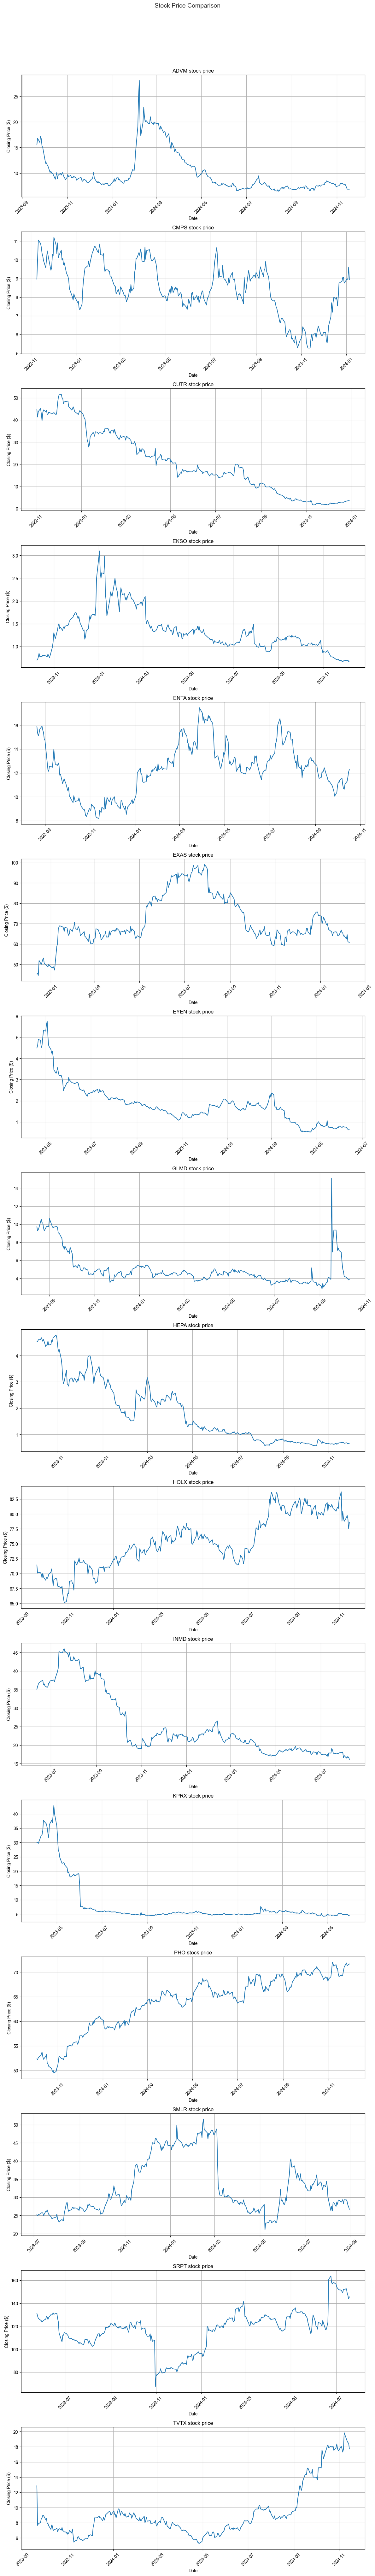

In [10]:
success_histories = get_histories(successful_tickers)

plot_stock_histories(success_histories);

## Graphs of unsuccessful price histories

In [11]:
failure_histories = get_histories(failure_tickers)

# plot_stock_histories(failure_histories);

$ZEAL: possibly delisted; no timezone found
$ACLY: possibly delisted; no price data found  (1d 2023-09-26 -> 2024-11-24)
$PRVB: possibly delisted; no timezone found
$GTHX: possibly delisted; no timezone found
$CNCE: possibly delisted; no timezone found
$KRTX: possibly delisted; no timezone found


## Quantifying how well clinical trial outcomes predict stock prices

This is approx where I ran out of time. The next two cells show the average proportionate change in stock price from the starting date (180 days before the trial results were submitted +- a day or two for weekends) up until the date of submission.

If the work I've done to produce these is correct and the sample of trials is representative, it seems like there would be a *negative* correlation between stock price and success of trial. I have a few hypotheses for this:

* Cutting off too early. I took the instruction to look at '180 days leading up to trial results' literally, which in retrospect feels like a mistake. Assuming information isn't being leaked or at least not too much, positive stock action should mainly happen *after* the results are published, and vice versa for negative results
* Selecting for companies that only run one trial might select for failure. Perhaps because they're not active enough or because, despite conceptually promising results - at least according to Claude's generic algorithm - they didn't get funding for further trials. The latter would explain companies with a single successful trial doing poorly, but not being outperformed by companies with a single *unsuccessful* trial.
* The 'success' algorithm is extremely rough. I had negligible time to refine it, but it seems like it might be essential to a project like this to develop something that much more reliably sorts trials. Alternatively, to do a reliable regression, it might be more effective to use the final grade as a numeric feature or set of features, rather than just for binary/ternary classification 
* Noise, especially given the relatively small number of trials that met all my requirements (score above or below some success value, have tickers that the LLMs could find, don't be within 180 days of other trials from the same company)
* Possible code errors. I haven't had much time to check the code beyond checking that it seemingly ran, so there's a reasonable chance of some results-distorting bugs hidden in there (e.g. mapping from company to ticker symbol was haphazard, so there might just be some companies which are entirely unrelated).

In [12]:
# proportionate_gain = (history.iloc[-1] - history.iloc[0]) / history.iloc[0]
# gains.append(proportionate_gain)
history = success_histories['ADVM']


start_date_offset = -180
end_date_offset = 7

# start_date = history['results_date'] + timedelta(days=days_before)
# max_date_changes = 4
# date_changes = 0
# while start_date not in history['data'].index:
#     start_date = start_date + timedelta(days=1)
#     date_changes += 1

def get_investment_multiple(history, start_date_offset, end_date_offset):
    def find_stock_date(history, offset):
        """In case we try and find a date without a stock price (e.g.) weekend.
        If we're offsetting backwards (looking for a start date), we adjust backwards,
        and vice versa, so we don't cross the streams"""
        date = history['results_date'] + timedelta(days=offset)
        sign = (offset >= 0) - (offset < 0)
        max_date_changes = 4
        date_changes = 0
        while date not in history['prices'].index and date_changes <= max_date_changes:
            # Limit the number of changes in case we hit the end of the price history
            # or some other implausbly long gap in the stock data (then exception will be raised)
            date = date + timedelta(days=sign)
            date_changes += 1
        return date
    
    start_date = find_stock_date(history, start_date_offset)
    end_date = find_stock_date(history, end_date_offset)
    start_value = history['prices'].loc[start_date]
    end_value = history['prices'].loc[end_date]
    investment_multiple = end_value / start_value
    return investment_multiple
# proportionate_price_change(history, 180, 1)
# history

In [13]:
def calculate_average_investment_multiple(histories, start_date_offset=-180, end_date_offset=7):
    multiples = []
    for ticker, info in histories.items():
        if info['prices'].any():
            
            investment_multiple = get_investment_multiple(info, start_date_offset, end_date_offset)
            multiples.append(investment_multiple)
            # import ipdb; ipdb.set_trace()
    return sum(multiples) / len(multiples)

s_multiple = calculate_average_investment_multiple(success_histories) 
f_multiple = calculate_average_investment_multiple(failure_histories) 

In [14]:
def find_optimal_offsets(success_data, failure_data, 
                         start_offset_range=(-180, 0), end_offset_range=(1, 30), step=1):
    """
    Finds the optimal start_date_offset and end_date_offset to maximize ROI.

    Parameters:
        success_data (dict): Dictionary of successful stocks.
        failure_data (dict): Dictionary of failed stocks.
        start_offset_range (tuple): Range of values for start_date_offset (inclusive).
        end_offset_range (tuple): Range of values for end_date_offset (inclusive).
        step (int): Step size for iterating over offset ranges.

    Returns:
        tuple: Optimal (start_date_offset, end_date_offset, max_roi).
    """
    optimal_start_offset = None
    optimal_end_offset = None
    max_roi = -np.inf

    # Iterate through start_date_offset and end_date_offset combinations
    for start_offset in range(start_offset_range[0], start_offset_range[1] + 1, step):
        for end_offset in range(end_offset_range[0], end_offset_range[1] + 1, step):
            # Calculate ROIs for successes and failures
            success_roi = calculate_average_investment_multiple(success_data, start_offset, end_offset)
            failure_roi = calculate_average_investment_multiple(failure_data, start_offset, end_offset)
            
            # Combine ROIs (if you have a specific method to combine them, apply it here)
            total_roi = success_roi - failure_roi  # Example combination
            
            # Update optimal values if we find a better ROI
            if total_roi > max_roi:
                max_roi = total_roi
                optimal_start_offset = start_offset
                optimal_end_offset = end_offset

    return optimal_start_offset, optimal_end_offset, max_roi

find_optimal_offsets(success_histories, failure_histories, 
                         start_offset_range=(-180, 0), end_offset_range=(1, 30), step=1)

(-1, 15, np.float64(0.06834539144047458))

In [ ]:
def calculate_profit(stock_prices, outcome, max_days=30):
    optimal_days_before, optimal_days_after = 0, 0
    max_profit = float('-inf')
    
    for N in range(1, max_days + 1):
        for M in range(1, max_days + 1):
            total_profit = 0
            
            for trial in trial_results:
                T = trial['date']
                outcome = trial['outcome']  # 1 for success, -1 for failure
                
                # Ensure indices are valid
                if T - N >= 0 and T + M < len(stock_prices):
                    pre_price = stock_prices[T - N]
                    post_price = stock_prices[T + M]
                    profit = outcome * (post_price - pre_price) / pre_price
                    total_profit += profit
            
            if total_profit > max_profit:
                max_profit = total_profit
                optimal_days_before, optimal_days_after = N, M
    
    return optimal_days_before, optimal_days_after, max_profit 

# Showing the average and spread of the changes in stock prices over the preceding 180 days when trial outcomes are known.

I had to rush this, so this is just aggregated from all price changes in the respective success/failure category

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple

def analyze_price_changes(success_histories: Dict[str, pd.Series], window: int = None) -> Tuple[dict, plt.Figure]:
    """
    Analyze price changes for stocks before trial outcomes.
    
    Args:
        success_histories: Dict mapping tickers to price Series
        window: Number of days to analyze
    """
    all_changes = []
    
    for ticker, prices in success_histories.items():
        if window:
            prices = prices[-window:]
        changes = prices.pct_change().dropna() * 100
        all_changes.extend(changes)

    stats = {
        'all': {
            'mean': np.mean(all_changes),
            'std': np.std(all_changes),
            'min': np.min(all_changes),
            'max': np.max(all_changes)
        }
    }

    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=all_changes, label='All Changes')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.title('Distribution of Price Changes')
    plt.xlabel('Price Change (%)')
    plt.ylabel('Density')
    plt.legend()
    
    return stats, plt.gcf()


stats, fig = analyze_price_changes(success_histories)
print(stats)
plt.show()

AttributeError: 'dict' object has no attribute 'pct_change'

In [ ]:
stats, fig = analyze_price_changes(failure_histories)
print(stats)
plt.show()